In [1780]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
from scipy.stats import linregress
import random as random

In [1781]:
def ifZero(val):
    if val == 0:
        if random.random() < .5:
            return -1*random.random()
        else:
            return random.random()
    else:
        return val
def sortByPosition(ions):
    ions.sort(key=lambda x:x.position, reverse=False)
    return ions
def getTable(ions):
    #ions = sortByPosition(ions)
    print("Charge\tIon\t\tPosition\t\tVelocity\t\tAcceleration")
    print("_________________________________________________________________________________")
    for x in ions:
        if x.charge == -1 and x.velocity < 0:
            print(x.charge,"\t",x.ion,"\t",x.position,"\t",x.velocity,"\t\t",x.acceleration)
        elif x.charge == -1 and x.velocity >= 0:
            print(x.charge,"\t",x.ion,"\t",x.position,"\t","",x.velocity,"\t\t",x.acceleration)
        elif x.charge == 1 and x.velocity < 0:
            print("",x.charge,"\t",x.ion,"\t",x.position,"\t",x.velocity,"\t\t",x.acceleration)
        elif x.charge == 1 and x.velocity >= 0:
            print("",x.charge,"\t",x.ion,"\t",x.position,"\t","",x.velocity,"\t\t",x.acceleration)
        else:
            print("",x.charge,"\t",x.ion,"\t",x.position,"\t",x.velocity,"\t\t",x.acceleration)
class ion:
    def __init__(self, val, count, pos):
        self.ion =  int(val)
        if count % 2 == 0:
            self.charge = 1
        else:
            self.charge = -1
        self.position = pos
        self.velocity = random.random()*ifZero(random.randrange(-1,1))
        self.acceleration = None
        self.timeLeft = None
        self.timeRight = None
def Acceleration(ions, element, get):
    ions = sortByPosition(ions)
    if element > len(ions):
        return print("Element",element,"does not exist")
    positive_left= 0
    positive_right = 0
    for x in range(len(ions)):
        if x >= element:
            continue
        if ions[x].charge == 1:
            positive_left += 1
    for x in range(len(ions)):
        if x <= element:
            continue
        if ions[x].charge == 1:
            positive_right += 1
    negative_left = element - positive_left
    negative_right = len(ions)-1-element-positive_right
    if (ions[element].charge == 1):
        # acc = positive_right - positive_left - negative_left + negative_right
        negativec = -1*negative_left + negative_right
        positivec = -1*positive_right + positive_left
        acc = (positivec + negativec)
    else:
        negativec = negative_left - negative_right
        positivec = positive_right - positive_left
        acc = (positivec + negativec)
    if get == False:
        ions[element].acceleration = acc
        return ions
    elif get == True:
        return print("Ion:",ions[element].ion,"\nPositive ions on left:",positive_left,"\nNegative ions on left",negative_left,"\nPositive ions on right:",positive_right,"\nNegative ions on right",negative_right)
def calculateAccelerations(ions, sort = True):
    if sort:
        sortByPosition(ions)
    for x in range(len(ions)):
        Acceleration(ions, x, False)
temp_ions = np.linspace(1, 100, 100)
position = []
for x in range(len(temp_ions)):
    position.append(random.random())
ions = []
for x in range(len(temp_ions)):
    ions.append(ion(temp_ions[x], x, position[x]))

In [1782]:
getTable(ions)

Charge	Ion		Position		Velocity		Acceleration
_________________________________________________________________________________
 1 	 1 	 0.4640317490664989 	  0.11746492151140642 		 None
-1 	 2 	 0.030500709412412896 	 -0.9292393064244225 		 None
 1 	 3 	 0.174671872781195 	  0.06406587011446384 		 None
-1 	 4 	 0.9751431263636957 	 -0.38996511598953343 		 None
 1 	 5 	 0.69316694828669 	 -0.7678457110295103 		 None
-1 	 6 	 0.40651993008670406 	  0.23306189011448836 		 None
 1 	 7 	 0.20859716186343868 	  0.31877345096497717 		 None
-1 	 8 	 0.04664003362282598 	 -0.5842763377791916 		 None
 1 	 9 	 0.35192420687000137 	  0.3647108648316742 		 None
-1 	 10 	 0.09494191347362213 	 -0.6421081349332809 		 None
 1 	 11 	 0.24756496995339794 	 -0.21592067708908202 		 None
-1 	 12 	 0.09148762676422661 	  0.16432602308875857 		 None
 1 	 13 	 0.1529424098647869 	 -0.0469199737001646 		 None
-1 	 14 	 0.435727612717119 	 -0.5102742321617841 		 None
 1 	 15 	 0.9281090046467905 	  0.0304272908

In [1783]:
Acceleration(ions, 3, True)
#this prints the information for acceleration for the ion that is in the 3rd smallest position

Ion: 27 
Positive ions on left: 0 
Negative ions on left 3 
Positive ions on right: 49 
Negative ions on right 47


In [1784]:
#setting accelerations based on how many to the left and right
for x in range(len(ions)):
    ions = sortByPosition(ions)
    Acceleration(ions, x, False)
getTable(ions)
# i think the math for calculating acceleration is wrong. This is what I currently need help with

Charge	Ion		Position		Velocity		Acceleration
_________________________________________________________________________________
-1 	 94 	 0.024688935495613573 	  0.13333219248705958 		 1
-1 	 82 	 0.028380222333797445 	 -0.6645133733979008 		 3
-1 	 2 	 0.030500709412412896 	 -0.9292393064244225 		 5
 1 	 27 	 0.03076218822103527 	 -0.40789508449406986 		 -5
-1 	 8 	 0.04664003362282598 	 -0.5842763377791916 		 5
 1 	 69 	 0.04835139702522817 	  0.9270625181060451 		 -5
 1 	 67 	 0.08258851724032146 	 -0.12658252939076467 		 -3
-1 	 12 	 0.09148762676422661 	  0.16432602308875857 		 3
-1 	 92 	 0.09423399727990711 	 -0.26560919090521196 		 5
-1 	 10 	 0.09494191347362213 	 -0.6421081349332809 		 7
 1 	 51 	 0.10044744889688284 	  0.34234686001046594 		 -7
-1 	 72 	 0.1071542192584396 	 -0.807876624818919 		 7
-1 	 60 	 0.11689290379222772 	 -0.9939440032518604 		 9
 1 	 81 	 0.1323831116455909 	 -0.08698376766454786 		 -9
-1 	 58 	 0.14414041613434447 	 -0.6387121812110521 		 9
 1 	 13 

In [1785]:
def solveQuadraticGreaterThanZero(a, b, c,): #quadratic formula
    if a == 0:
        if -c / b > 0:
            return -c / b
        return None
    d = b * b - 4 * a * c
    if d < 0:
        return None
    x1 = (-b + np.sqrt(d)) / (2 * a)
    x2 = (-b - np.sqrt(d)) / (2 * a)
    if x1 > 0:
        if x2 > 0:
            return min(x1, x2)
        else:
            return x1
    elif x2 > 0:
        return x2
    return None
def calculateCollisionTime(ions, debug = False):
    ions = sortByPosition(ions)

    # "collision events"
    events = []

    # first/last ion with wall:
    # wallPos = a/2 * t^2 + v * t + pos
    leftWallTime = solveQuadraticGreaterThanZero(ions[0].acceleration / 2, ions[0].velocity, ions[0].position)
    events.append([leftWallTime, 0, 'wall'])
    rightWallTime = solveQuadraticGreaterThanZero(ions[-1].acceleration / 2, ions[-1].velocity, ions[-1].position - 1)
    events.append([rightWallTime, -1, 'wall'])

    for i in range(1, len(ions)):
        # adjacent ion pairs:
        # a1/2 * t^2 + v1 * t + pos1 = a2/2 * t^2 + v2 * t + pos2
        pairTime = solveQuadraticGreaterThanZero(
            ions[i].acceleration / 2 - ions[i - 1].acceleration / 2,
            ions[i].velocity - ions[i - 1].velocity,
            ions[i].position - ions[i - 1].position
        )
        events.append([pairTime, i, i - 1])
    # exclude events that will not happen
    events = [e for e in events if e[0] is not None]
    #for x in events:
      # print(x, sep='') 
    if len(events) == 0:
        return [None, None, None]

    # find the first event
    return min(events, key = lambda e: e[0])
calculateCollisionTime(ions)

[0.0008886430665842604, 71, 70]

In [1786]:
def evolve(ions, time, element):
    #new position = s + v*t + (a*t^2/2)
    s = ions[element].position + ions[element].velocity*time + (ions[element].acceleration*time**2)/2
    #changed by vwb
    v = ions[element].velocity + ions[element].acceleration*time
    #Comment by vwb
    #there is something messed up about this.  If an ion hit's the wall, it should trigger a 'wall' least time event, 
    #and it should never really go past 0 or 1, it should just reverse velocity
    if s <= 0:
        s *= -1
        v *= -1
    elif s >= 1:
        #modified by vwb
        s = 2-s
        v *= -1
    ions[element].position = s
    #new velocity = v + a*t
    ions[element].velocity = v
    #Acceleration(ions, element, False)

In [1787]:
def evolveAmount(ions, amount):
    pos = []
    vels = []
    times = []
    for y in range(amount):
        leastTime = calculateCollisionTime(ions)
        for x in range(len(ions)):
            evolve(ions, leastTime[0], x)
            pos.append(ions[x].position)
            vels.append(ions[x].velocity)
    pos.sort()
    vels.sort()
    calculateAccelerations(ions, False)
    return [pos, vels]
#evo = evolveAmount(ions, 100)
#plt.plot(evo[1], evo[0])
#plt.show()
#print (min(evo[0]))

In [1788]:
def evolveAmountTable(ions, amount):
    initial_pos = []
    final_pos = []
    times = []
    for y in range(amount):
        message = ''
        leastTime = calculateCollisionTime(ions)
        times.append(leastTime)
        for x in range(len(ions)):
            evolve(ions, leastTime[0], x)
        message += "Table for evolution number "+str(y+1)
        if leastTime[2] is 'wall':
            message += '\nThis was a wall collision, therefore no ions switched positions'
        else:
            ions[leastTime[1]], ions[leastTime[2]] = ions[leastTime[2]], ions[leastTime[1]]
            message += "\nThis was evoled for "+str(leastTime[0])+" seconds\nIon "+str(ions[leastTime[1]].ion)+" collided with ion "+str(ions[leastTime[2]].ion)
        calculateAccelerations(ions, False)
        print(message)
        getTable(ions)
        print('\n\n')
#evolveAmountTable(ions, 20)

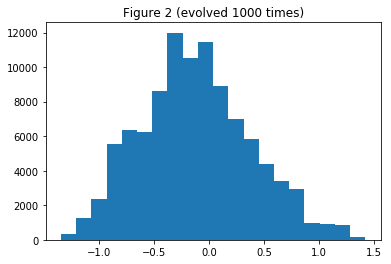

In [1789]:
times = []
energies = []
P_pos = []
P_neg = []
def getHistogram(ions, amount, figure):
    vels = []
    ion_positions = []
    for y in range(amount):
        leastTime = calculateCollisionTime(ions)
        if y is not 0:
            times.append(leastTime[0]+ times[y-1])
        else:
            times.append(leastTime[0])
        energy = 0
        for x in range(len(ions)):
            evolve(ions, leastTime[0], x)
            #Accerleration(ions, x, False)
            ion_positions.append(ions[x].position)
            vels.append(ions[x].velocity)
            energy += (ions[x].velocity**2) * 0.5
            if x is 0:
                continue;
            elif ions[x].charge is 1 and ions[x-1].charge is 1:
                P_pos.append((ions[x].position - ions[x-1].position))
            elif ions[x].charge is -1 and ions[x-1].charge is -1:
                P_pos.append((ions[x].position - ions[x-1].position))
            else:
                P_neg.append((ions[x].position - ions[x-1].position))
        energies.append(energy)
        #calculateAccelerations(ions, False)
        for x in range(len(ions)):
            Acceleration(ions, x, False)
    if figure is 'positions':
        plt.hist(ion_positions, bins=20)
    else:
        plt.hist(vels, bins=20)
    plt.title('Figure 2 (evolved '+str(amount)+' times)')
    plt.show()
getHistogram(ions, 1000, 'vels')

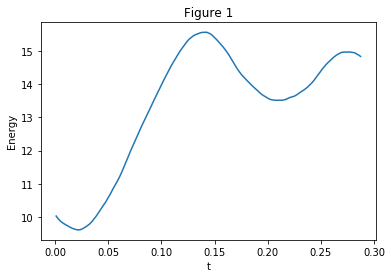

In [1790]:
plt.plot(times, energies)
plt.xlabel('t')
plt.ylabel('Energy')
plt.title('Figure 1')
plt.show()

In [1881]:
P_pos = []
P_neg = []
for x in range(len(ions)):
    for y in range(len(ions)):
        if x is y:
            continue;
        if ions[x].charge is ions[y].charge:
            P_pos.append(np.abs(ions[x].position - ions[y].position))
        elif ions[x].charge is not ions[y].charge:
            P_neg.append(np.abs(ions[x].position - ions[y].position))
for y in range(len(P_pos)):
    P_pos[y] = P_pos[y]/(P_pos[y]+P_neg[y])
    P_neg[y] = P_neg[y]/(P_pos[y]+P_neg[y])

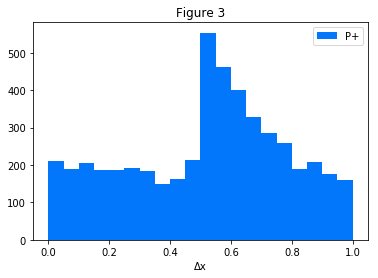

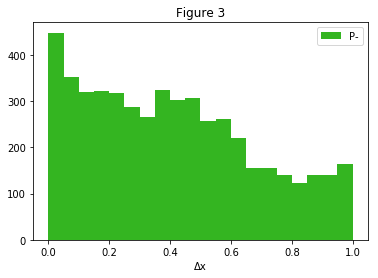

In [1882]:
plt.hist(P_pos, bins=20, label='P+', color='#0377fc')
plt.title('Figure 3')
plt.legend(loc="upper right")
plt.xlabel('Δx')
plt.show()
plt.hist(P_neg, bins = 20, label='P-', color='#34b521')
plt.title('Figure 3')
plt.xlabel('Δx')
plt.legend(loc="upper right")
plt.show()

In [1840]:
getTable(ions)

Charge	Ion		Position		Velocity		Acceleration
_________________________________________________________________________________
-1 	 10 	 0.00154494824492 	  0.501868854102 		 1
-1 	 76 	 0.00418367702852 	  1.21031712359 		 3
 1 	 37 	 0.00489579657055 	  0.650724029139 		 -3
 1 	 61 	 0.00718433949017 	 -0.46872704158 		 -1
-1 	 72 	 0.0194115652472 	 -0.437576860319 		 1
-1 	 8 	 0.0279977081618 	  0.00822583874918 		 3
 1 	 51 	 0.0284067693864 	  0.528409072839 		 -3
-1 	 54 	 0.0390393398749 	 -0.899758933849 		 3
-1 	 60 	 0.0513198808012 	 -0.129537716695 		 5
 1 	 13 	 0.0598359190336 	  0.810062902971 		 -5
 1 	 99 	 0.0631610314662 	 -0.329565719304 		 -3
 1 	 67 	 0.0900587059724 	  0.806376390571 		 -1
-1 	 82 	 0.104836267485 	  0.2898220984 		 1
-1 	 40 	 0.109348173421 	 -1.01665466371 		 3
 1 	 91 	 0.110397469272 	 -0.376396329884 		 -3
-1 	 68 	 0.128644170861 	 -0.607560123961 		 3
-1 	 36 	 0.130763892239 	 -0.951881513714 		 5
 1 	 3 	 0.132618838068 	  0.064266849

In [1887]:
positive_less = 0
negative_less = 0
negative_more = 0
positive_more = 0
for x in range(len(ions)):
    if x < 50 and ions[x].charge is 1:
        positive_less+=1
    elif x < 50 and ions[x].charge is -1:
        negative_less+=1
    elif x >= 50 and ions[x].charge is 1:
        positive_more+=1
    else:
        negative_more+=1
print(positive_less, negative_less, positive_more, negative_more)
Acceleration(ions, 49, True)
print("END CODING")
print("_______________________________________________________________________________________________________")

25 25 25 25
Ion: 71 
Positive ions on left: 24 
Negative ions on left 25 
Positive ions on right: 25 
Negative ions on right 25
END CODING
_______________________________________________________________________________________________________


# Post lab writeup
What does figure 1 mean?
- Figure one demonstrates how the average kinetic energy of the system evolves with time.

What does figure 2 mean?
- Figure two demonstrates and shows that the velocities follow a Maxwell distribution.

What does figure 3 mean?
- Figure three demonstrates that the probability of ions with alike charges being next to each other is less likely when the Δx is small, but as Δx increases, the probability becomes closer to 50/50, it could be a same sign ion, or different sign ion.